### Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

###Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

#### Dataset:  https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link

####Key components to be fulfilled :

1. Loading and Preprocessing
 Load the dataset and perform necessary preprocessing steps.

   
2. Model Implementation
 Implement the following five regression algorithms:

A) Linear Regression

B) Decision Tree Regressor

C) Random Forest Regressor

D) Gradient Boosting Regressor

E) Support Vector Regressor


3. Model Evaluation
Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
Identify the best performing model and justify why it is the best.


4. Feature Importance Analysis
Identify the significant variables affecting car prices (feature selection)


5. Hyperparameter Tuning
Perform hyperparameter tuning and check whether the performance of the model has increased.


### Importing Libraries & Getting Dataset Information

In [ ]:
# Standard library imports

import pandas as pd # for data manipulation and analysis, CSV file I/O
import numpy as np # For numerical operations and mathematical functions
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical graphics



In [ ]:
# data loading
file_path= "//content//CarPrice_Assignment.csv"

df=pd.read_csv(file_path)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


**There is no null values in any column**

In [ ]:
df.shape

(205, 26)

- **No of Rows = 205**
-**No of Column = 26**

In [ ]:
df.duplicated().sum()

0

No Duplicates.

In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.00,59.32,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.26,0.31,2.07,3.11,3.29,3.41,4.17


- **count =** The number of non-null values.
- **mean =** Avarage.
- **Standard Deviation (std)=** A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data.
- **min =** The smallest value.
- **25% =** It represents the value below which 25% of the data fall
- **50% =** It represents the value below which 50% of the data fall
- **75% =** It represents the value below which 75% of the data fall
- **max =** The largest value.

In [ ]:
# Descriptive analysis of Categorical Variables only.
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


### Data Exploration(EDA)

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

#### DATA VISUALIZATION

In [ ]:
carname=df.CarName.value_counts()
carname

,count
CarName,
toyota corona,6
toyota corolla,6
peugeot 504,6
subaru dl,4
mitsubishi mirage g4,3
...,...
mazda glc 4,1
mazda rx2 coupe,1
maxda glc deluxe,1


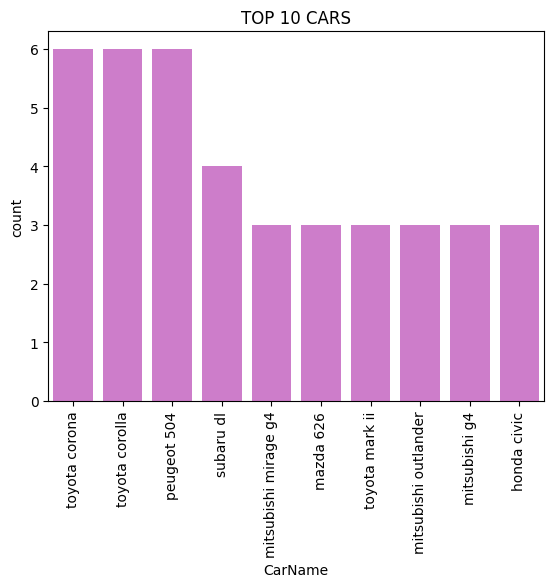

In [ ]:
sns.barplot(data=carname.head(10),color="orchid")
plt.title('TOP 10 CARS')
plt.xticks(rotation=90)
plt.show()

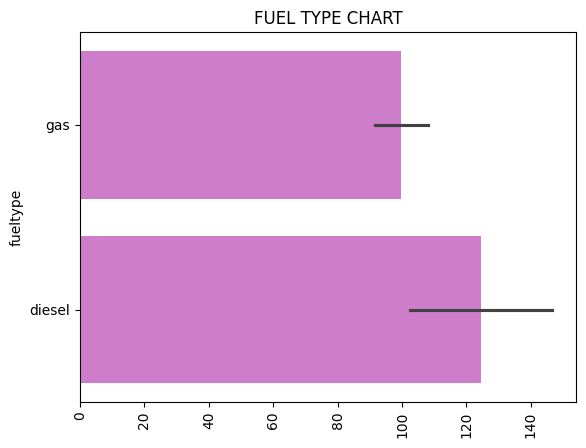

In [ ]:
sns.barplot(data=df.fueltype ,color="orchid")
plt.title('FUEL TYPE CHART')
plt.xticks(rotation=90)
plt.show()

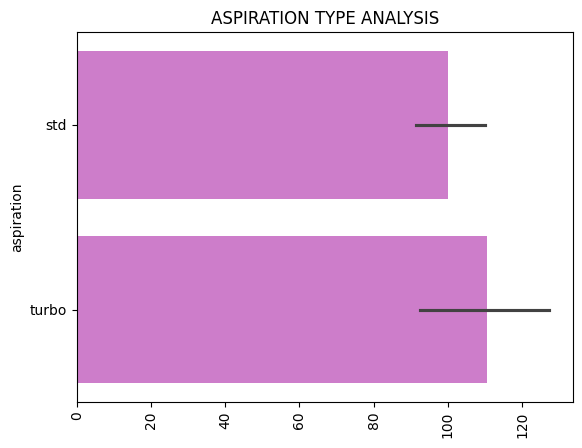

In [ ]:
sns.barplot(data=df.aspiration ,color="orchid")
plt.title('ASPIRATION TYPE ANALYSIS')
plt.xticks(rotation=90)
plt.show()

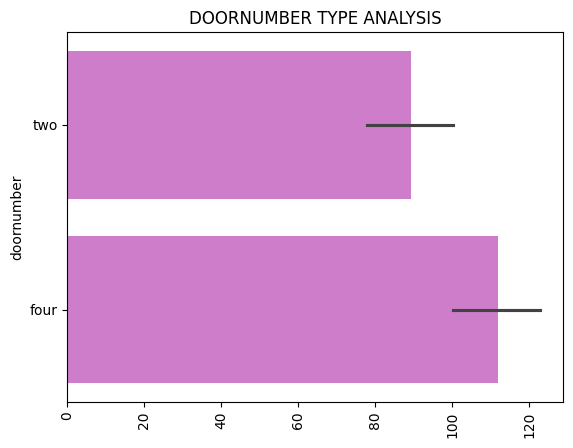

In [ ]:
sns.barplot(data=df.doornumber  ,color="orchid")
plt.title('DOORNUMBER TYPE ANALYSIS')
plt.xticks(rotation=90)
plt.show()

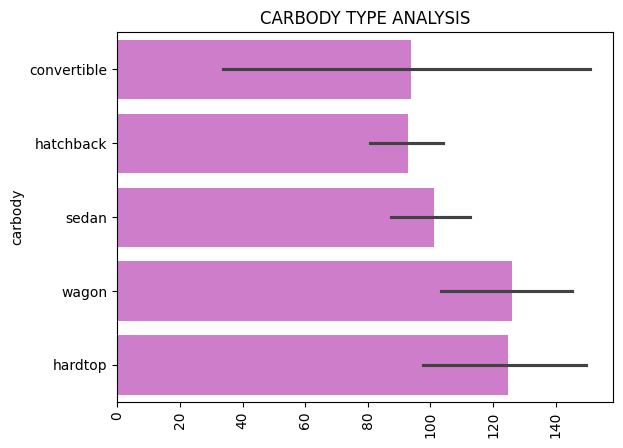

In [ ]:
sns.barplot(data=df.carbody  ,color="orchid")
plt.title('CARBODY TYPE ANALYSIS')
plt.xticks(rotation=90)
plt.show()

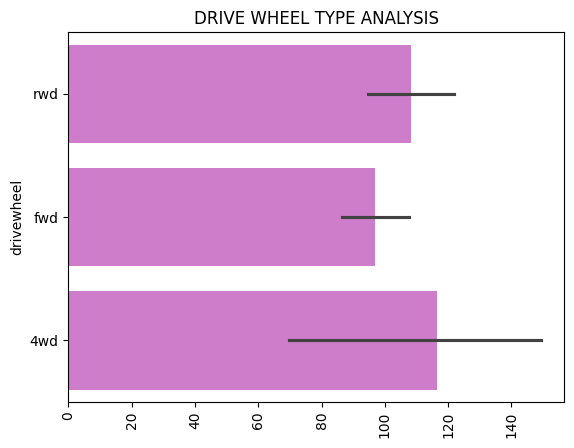

In [ ]:
sns.barplot(data=df.drivewheel   ,color="orchid")
plt.title('DRIVE WHEEL TYPE ANALYSIS')
plt.xticks(rotation=90)
plt.show()

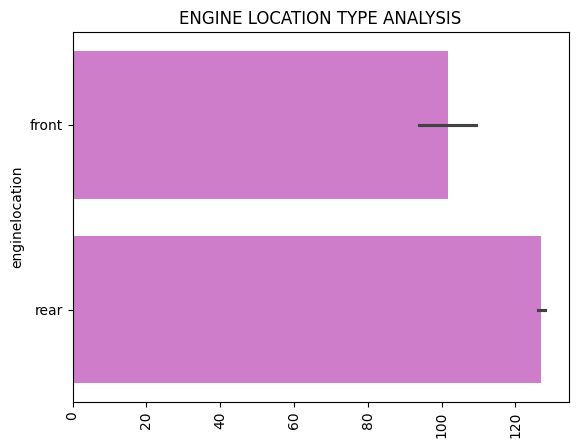

In [ ]:
sns.barplot(data=df.enginelocation  ,color="orchid")
plt.title('ENGINE LOCATION TYPE ANALYSIS')
plt.xticks(rotation=90)
plt.show()

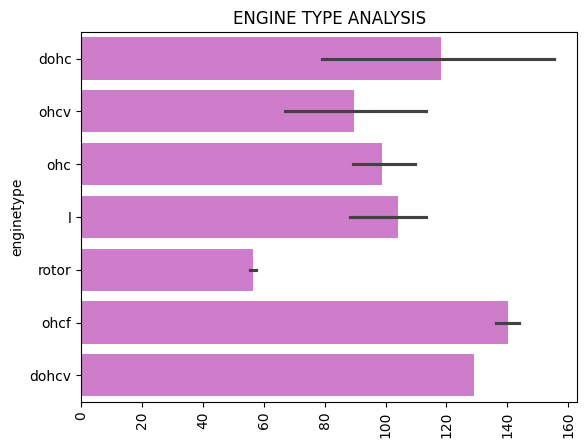

In [ ]:
sns.barplot(data=df.enginetype,color="orchid")
plt.title('ENGINE TYPE ANALYSIS')
plt.xticks(rotation=90)
plt.show()

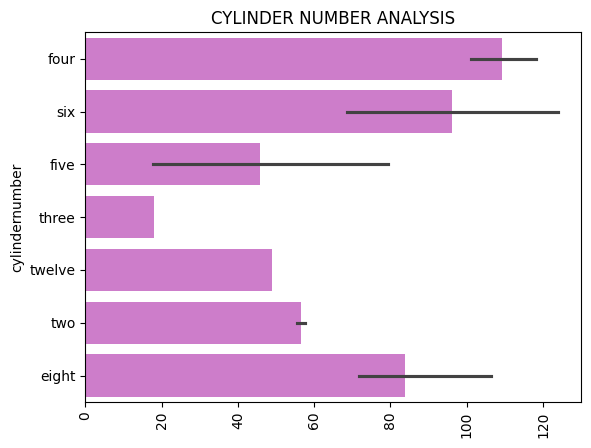

In [ ]:
sns.barplot(data=df.cylindernumber ,color="orchid")
plt.title('CYLINDER NUMBER ANALYSIS')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Select relevant columns
X = df.drop(['price'], axis=1)
y = df['price']

# Correlation analysis
corr_matrix = X.corrwith(y,numeric_only=True)
print(corr_matrix.abs().sort_values(ascending=False))

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID              0.109093
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
dtype: float64


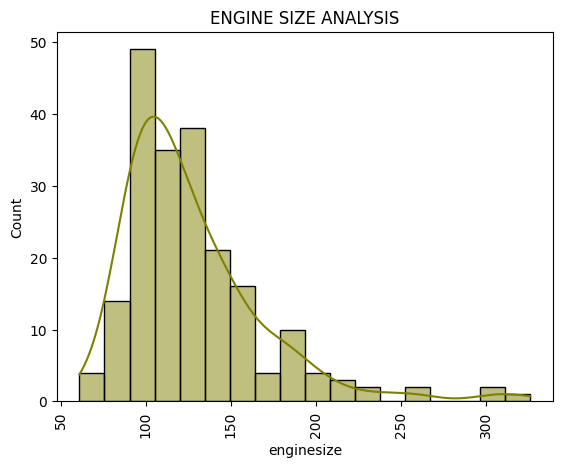

In [ ]:
sns.histplot(data=df.enginesize,kde=True  ,color="olive")
plt.title('ENGINE SIZE ANALYSIS')
plt.xticks(rotation=90)
plt.show()

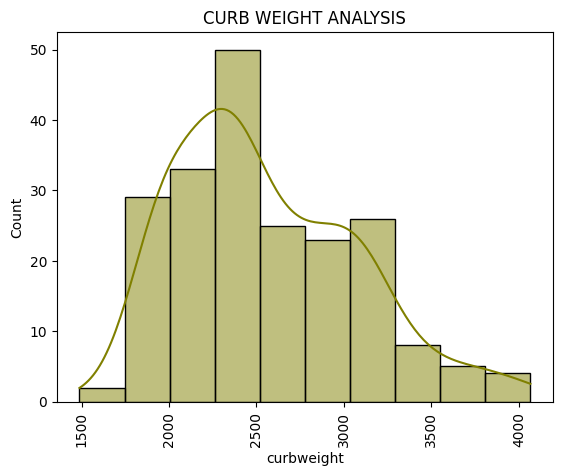

In [ ]:
sns.histplot(data=df.curbweight,kde=True  ,color="olive")
plt.title('CURB WEIGHT ANALYSIS')
plt.xticks(rotation=90)
plt.show()

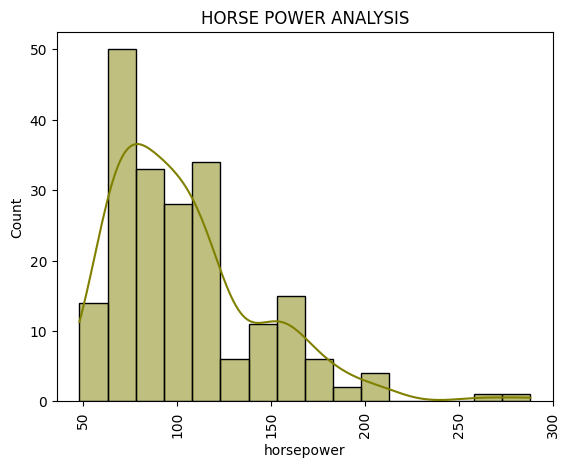

In [ ]:
sns.histplot(data=df.horsepower,kde=True  ,color="olive")
plt.title('HORSE POWER ANALYSIS')
plt.xticks(rotation=90)
plt.show()

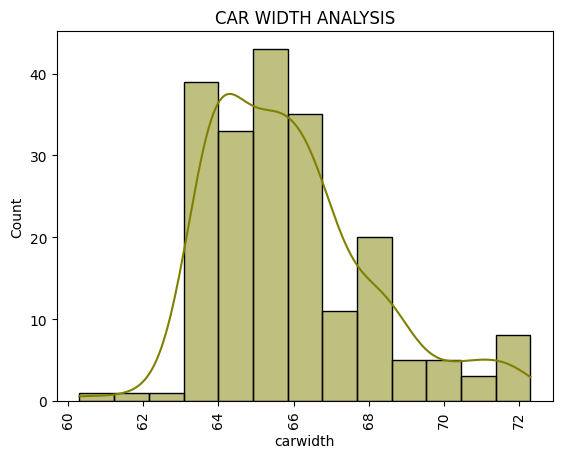

In [ ]:
sns.histplot(data=df.carwidth,kde=True  ,color="olive")
plt.title('CAR WIDTH ANALYSIS')
plt.xticks(rotation=90)
plt.show()

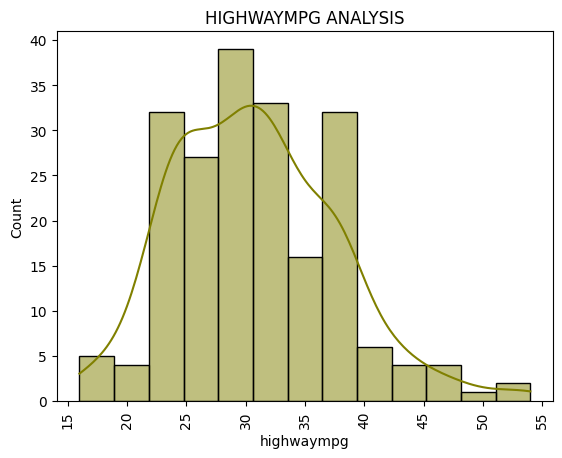

In [ ]:
sns.histplot(data=df.highwaympg,kde=True  ,color="olive")
plt.title('HIGHWAYMPG ANALYSIS')
plt.xticks(rotation=90)
plt.show()

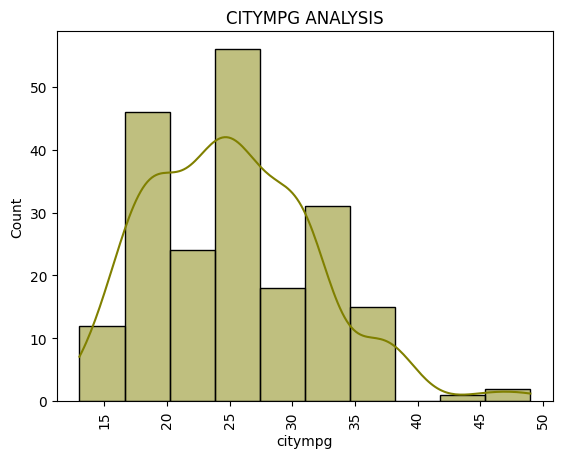

In [ ]:
sns.histplot(data=df.citympg,kde=True  ,color="olive")
plt.title('CITYMPG ANALYSIS')
plt.xticks(rotation=90)
plt.show()

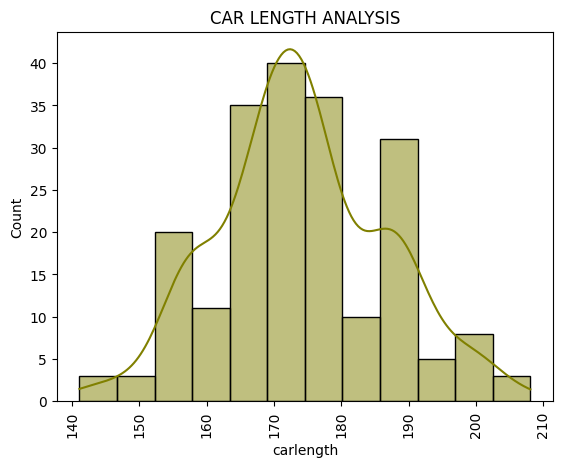

In [ ]:
sns.histplot(data=df.carlength,kde=True  ,color="olive")
plt.title('CAR LENGTH ANALYSIS')
plt.xticks(rotation=90)
plt.show()

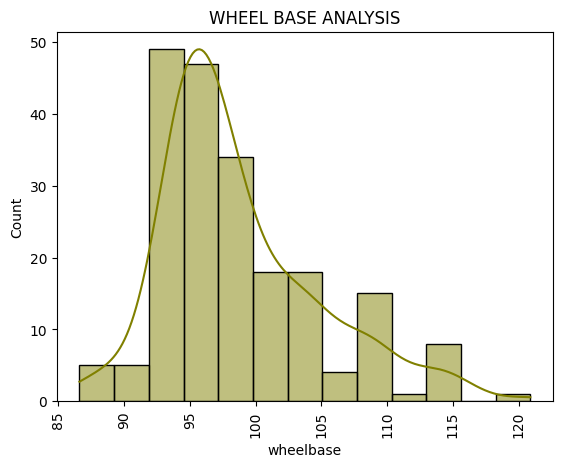

In [ ]:
sns.histplot(data=df.wheelbase,kde=True  ,color="olive")
plt.title('WHEEL BASE ANALYSIS')
plt.xticks(rotation=90)
plt.show()

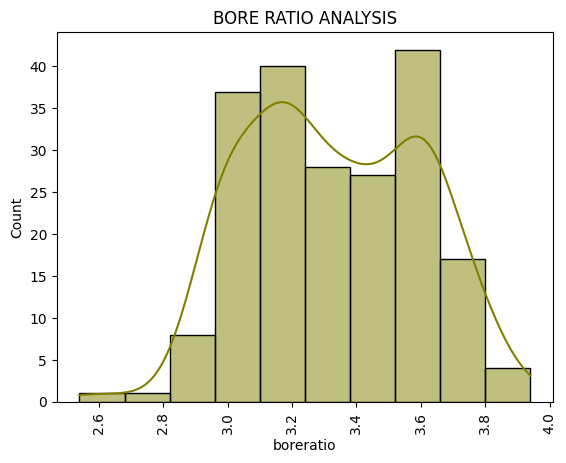

In [ ]:
sns.histplot(data=df.boreratio,kde=True  ,color="olive")
plt.title('BORE RATIO ANALYSIS')
plt.xticks(rotation=90)
plt.show()

#### CORRELATION ANALYSIS

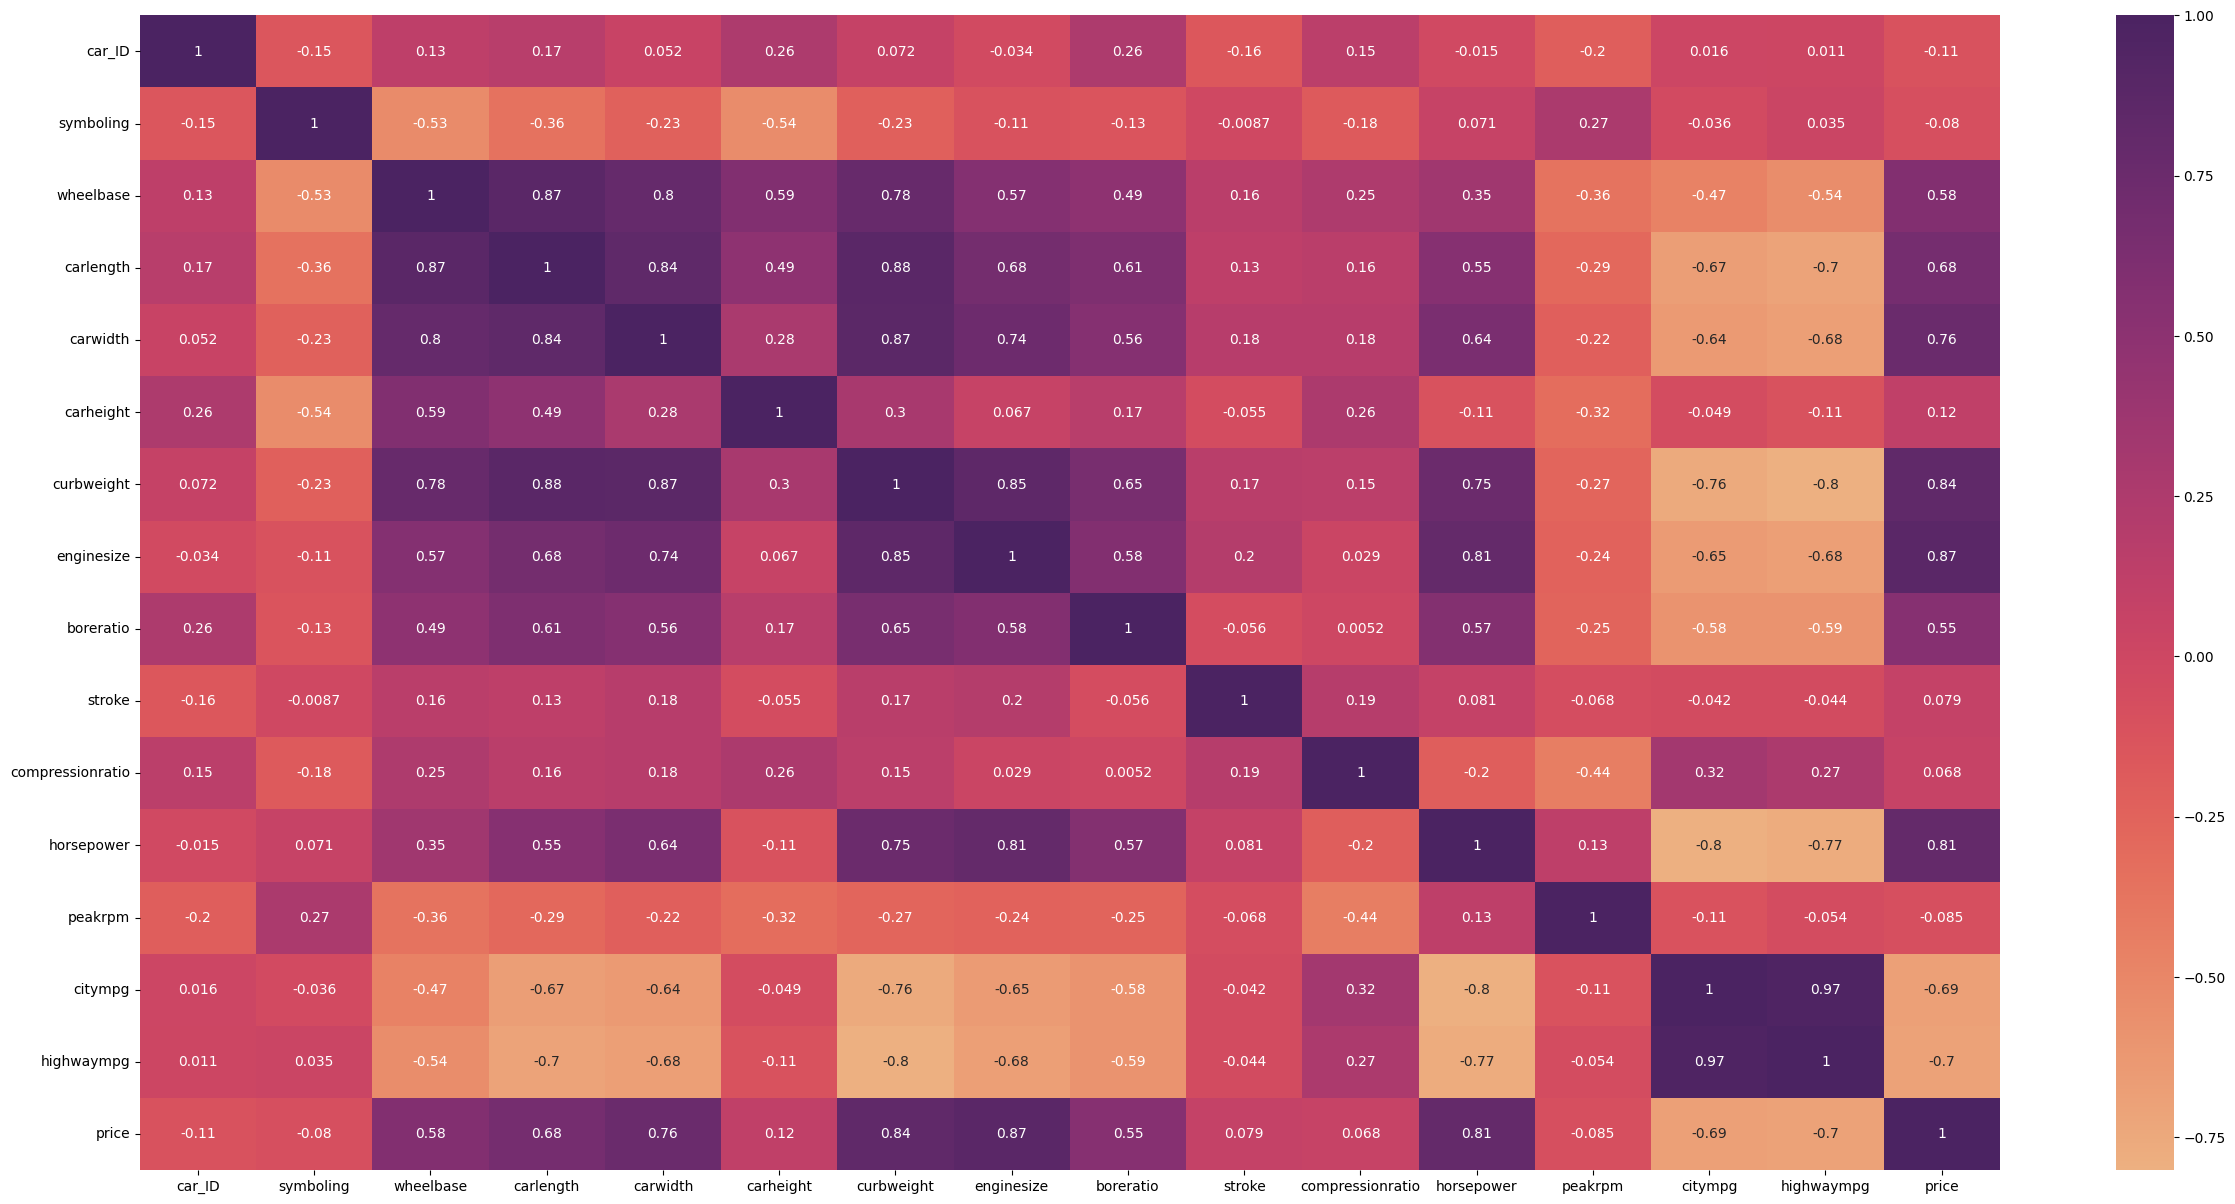

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix,annot=True,cmap='flare')
plt.show()

In [ ]:
print(corr_matrix.abs().sort_values(ascending=False)<0.5)

enginesize          False
curbweight          False
horsepower          False
carwidth            False
highwaympg          False
citympg             False
carlength           False
wheelbase           False
boreratio           False
carheight            True
car_ID               True
peakrpm              True
symboling            True
stroke               True
compressionratio     True
dtype: bool


In [ ]:
### droping unwanted columns.
df1= df.drop(['carheight','car_ID','peakrpm','symboling','stroke','compressionratio','aspiration','fuelsystem','enginelocation','CarName'],axis=1)

In [ ]:
df1.head()

,fueltype,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,two,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,13495.0
1,gas,two,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,16500.0
2,gas,two,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,26,16500.0
3,gas,four,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,30,13950.0
4,gas,four,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,22,17450.0


In [ ]:
df1.drivewheel.value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


In [ ]:

df1['drivewheel'] = df['drivewheel'].apply(lambda x: 'fwd' if x == '4wd' else x)

In [ ]:
df1.drivewheel.value_counts()

,count
drivewheel,
fwd,129
rwd,76


In [ ]:
df1.shape

(205, 16)

#### ENCODING CATEGORICAL VALUES

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
col_encode= ['fueltype','doornumber','carbody','enginetype','cylindernumber','drivewheel']


In [ ]:
oe = OrdinalEncoder()
df1[col_encode]=oe.fit_transform(df1[col_encode])

In [ ]:
df1.head()

,fueltype,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,1.0,1.0,0.0,2.0,88.6,168.8,64.1,2548,0.0,2.0,130,3.47,111,21,27,13495.0
1,1.0,1.0,0.0,2.0,88.6,168.8,64.1,2548,0.0,2.0,130,3.47,111,21,27,16500.0
2,1.0,1.0,2.0,2.0,94.5,171.2,65.5,2823,5.0,3.0,152,2.68,154,19,26,16500.0
3,1.0,0.0,3.0,1.0,99.8,176.6,66.2,2337,3.0,2.0,109,3.19,102,24,30,13950.0
4,1.0,0.0,3.0,0.0,99.4,176.6,66.4,2824,3.0,1.0,136,3.19,115,18,22,17450.0


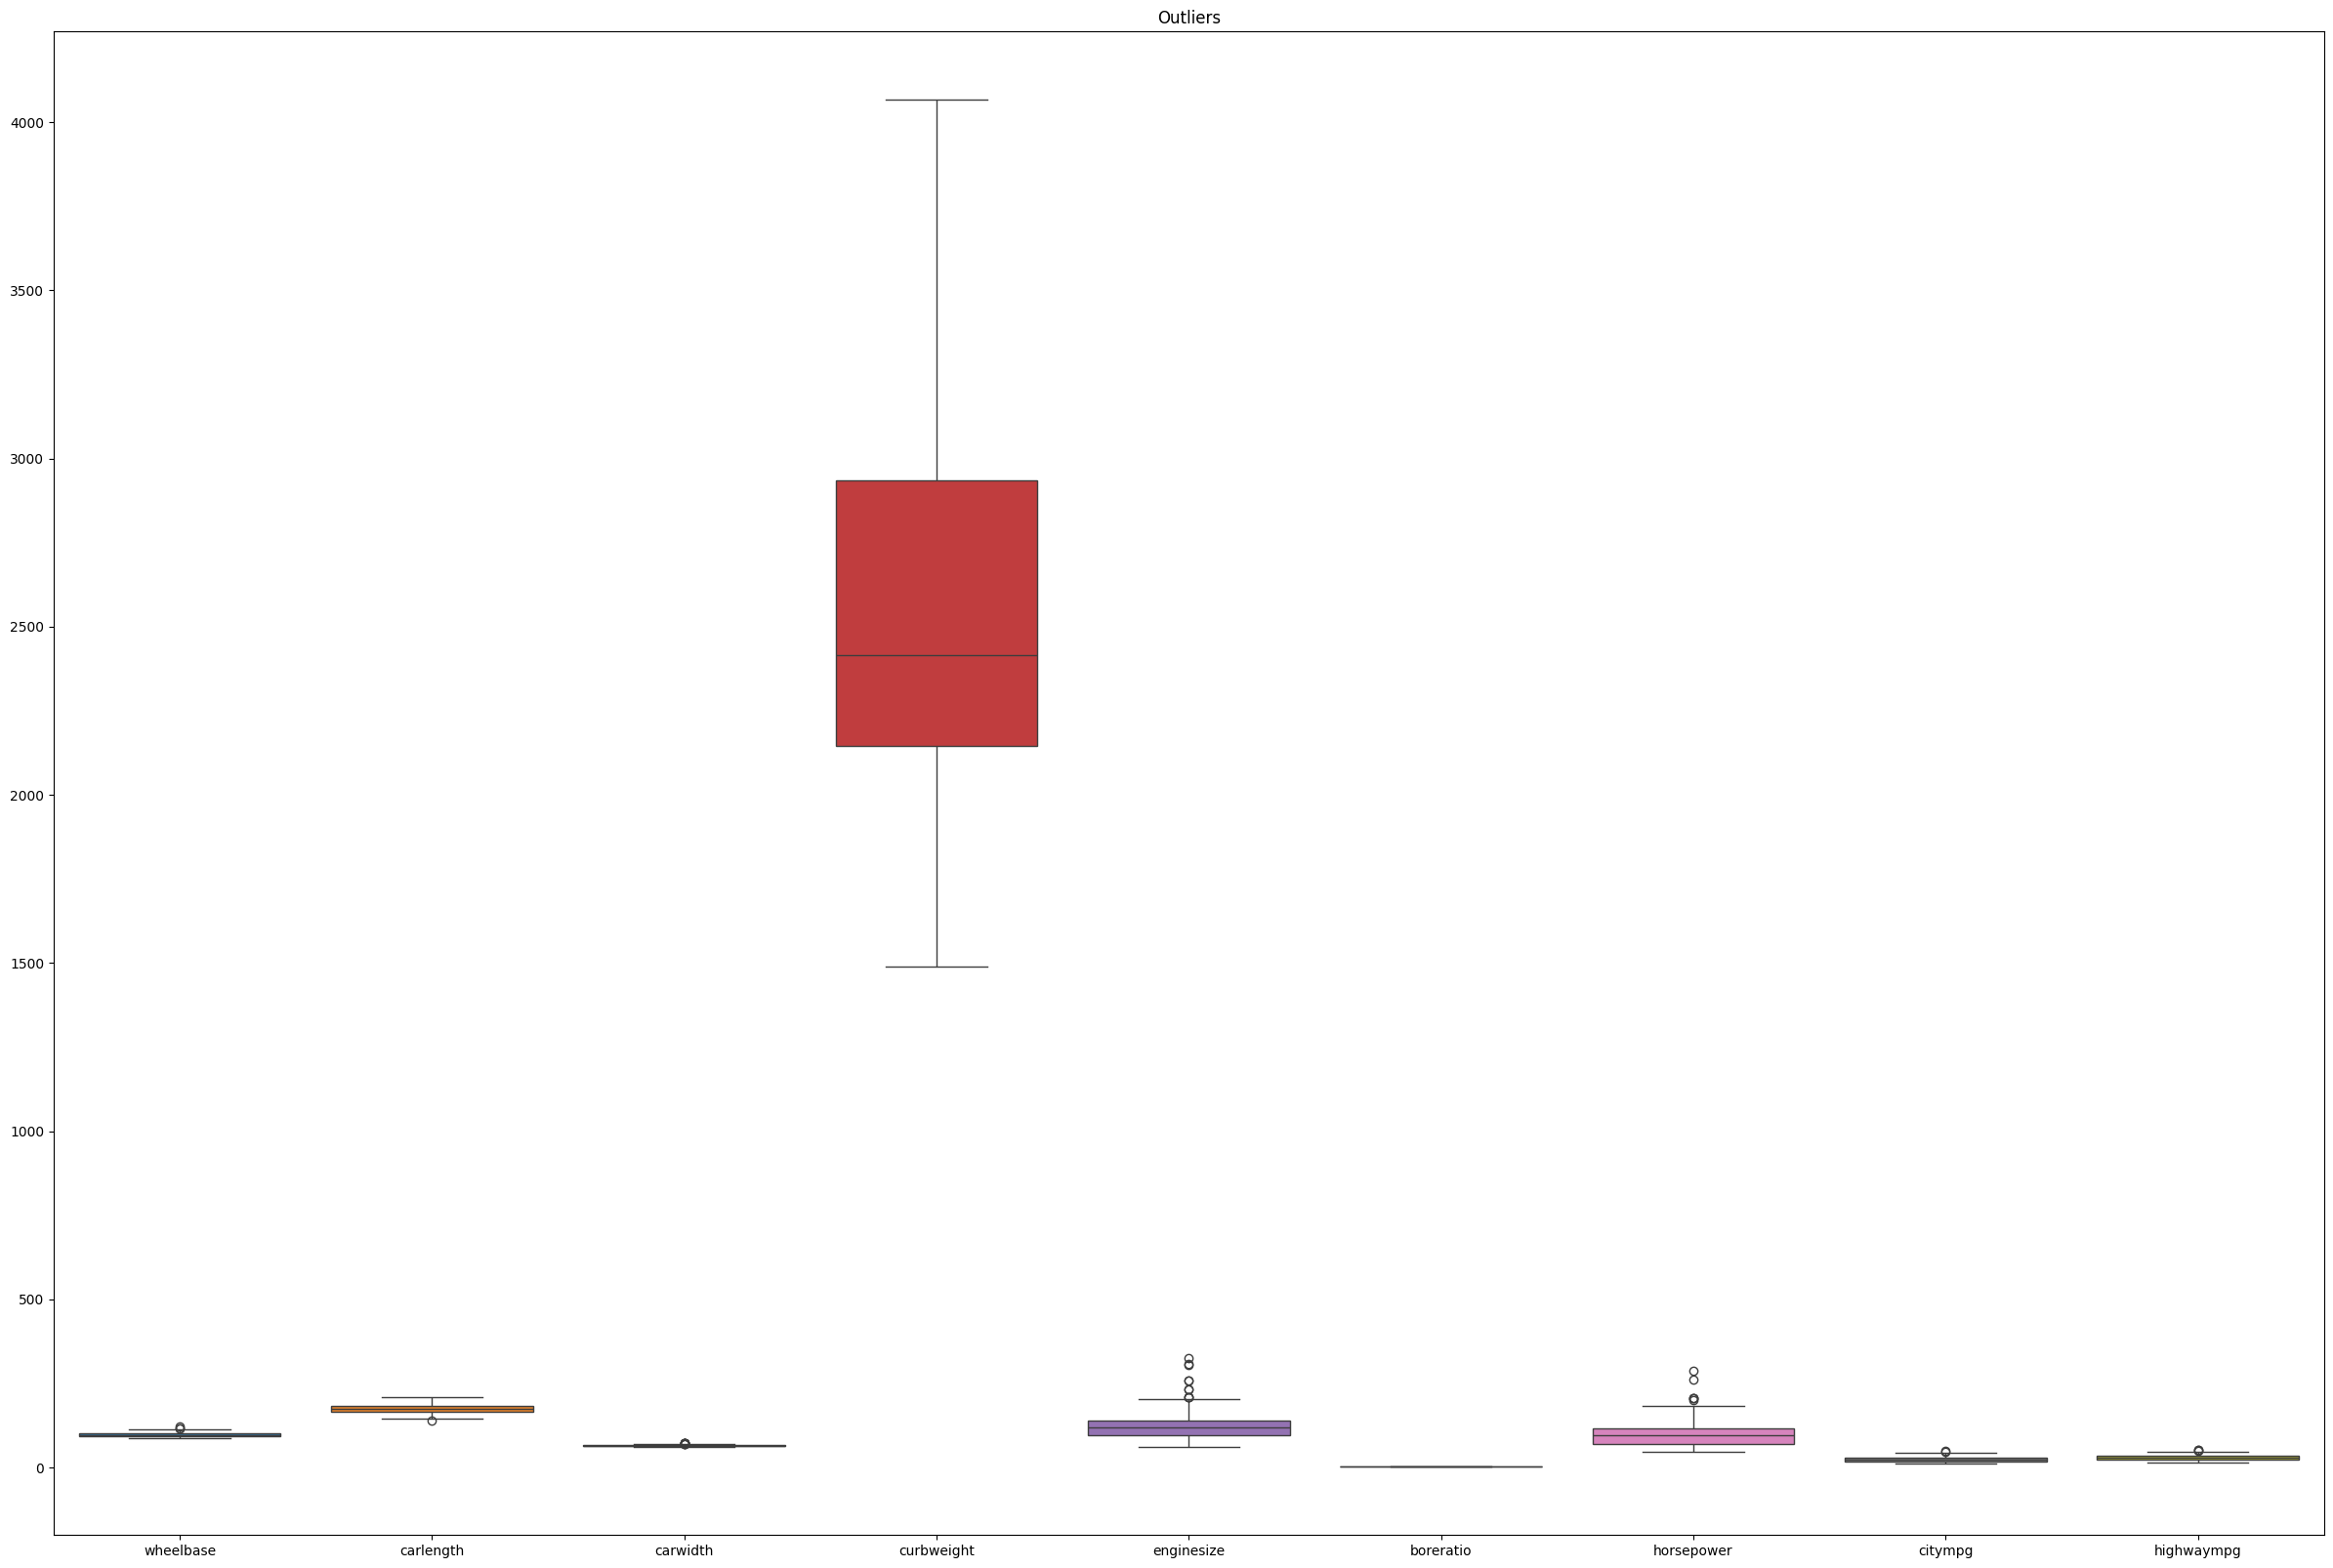

In [ ]:
#visualizing outliers
plt.figure(figsize=(30, 20))
outliersColumns = df1.get(['wheelbase',	'carlength',	'carwidth',	'curbweight','enginesize',	'boreratio',	'horsepower',	'citympg',	'highwaympg'	])
sns.boxplot(data=outliersColumns)
plt.title("Outliers")
plt.show()

In [ ]:
def iqr_cap(columns):
    for col in columns:
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + (1.5 * iqr)
        lower_limit = q1 - (1.5 * iqr)

        print(f"Column: {col}")
        print(f"Upper limit: {upper_limit}, Lower limit: {lower_limit}")
        print()

        df1[col] = df1[col].apply(lambda x: lower_limit if x < lower_limit else
                                   upper_limit if x > upper_limit else x)




In [ ]:
iqr_cap(outliersColumns)

Column: wheelbase
Upper limit: 114.25000000000001, Lower limit: 82.64999999999999

Column: carlength
Upper limit: 208.29999999999995, Lower limit: 141.10000000000002

Column: carwidth
Upper limit: 71.10000000000002, Lower limit: 59.89999999999998

Column: curbweight
Upper limit: 4120.0, Lower limit: 960.0

Column: enginesize
Upper limit: 207.0, Lower limit: 31.0

Column: boreratio
Upper limit: 4.2250000000000005, Lower limit: 2.505

Column: horsepower
Upper limit: 185.0, Lower limit: 1.0

Column: citympg
Upper limit: 46.5, Lower limit: 2.5

Column: highwaympg
Upper limit: 47.5, Lower limit: 11.5



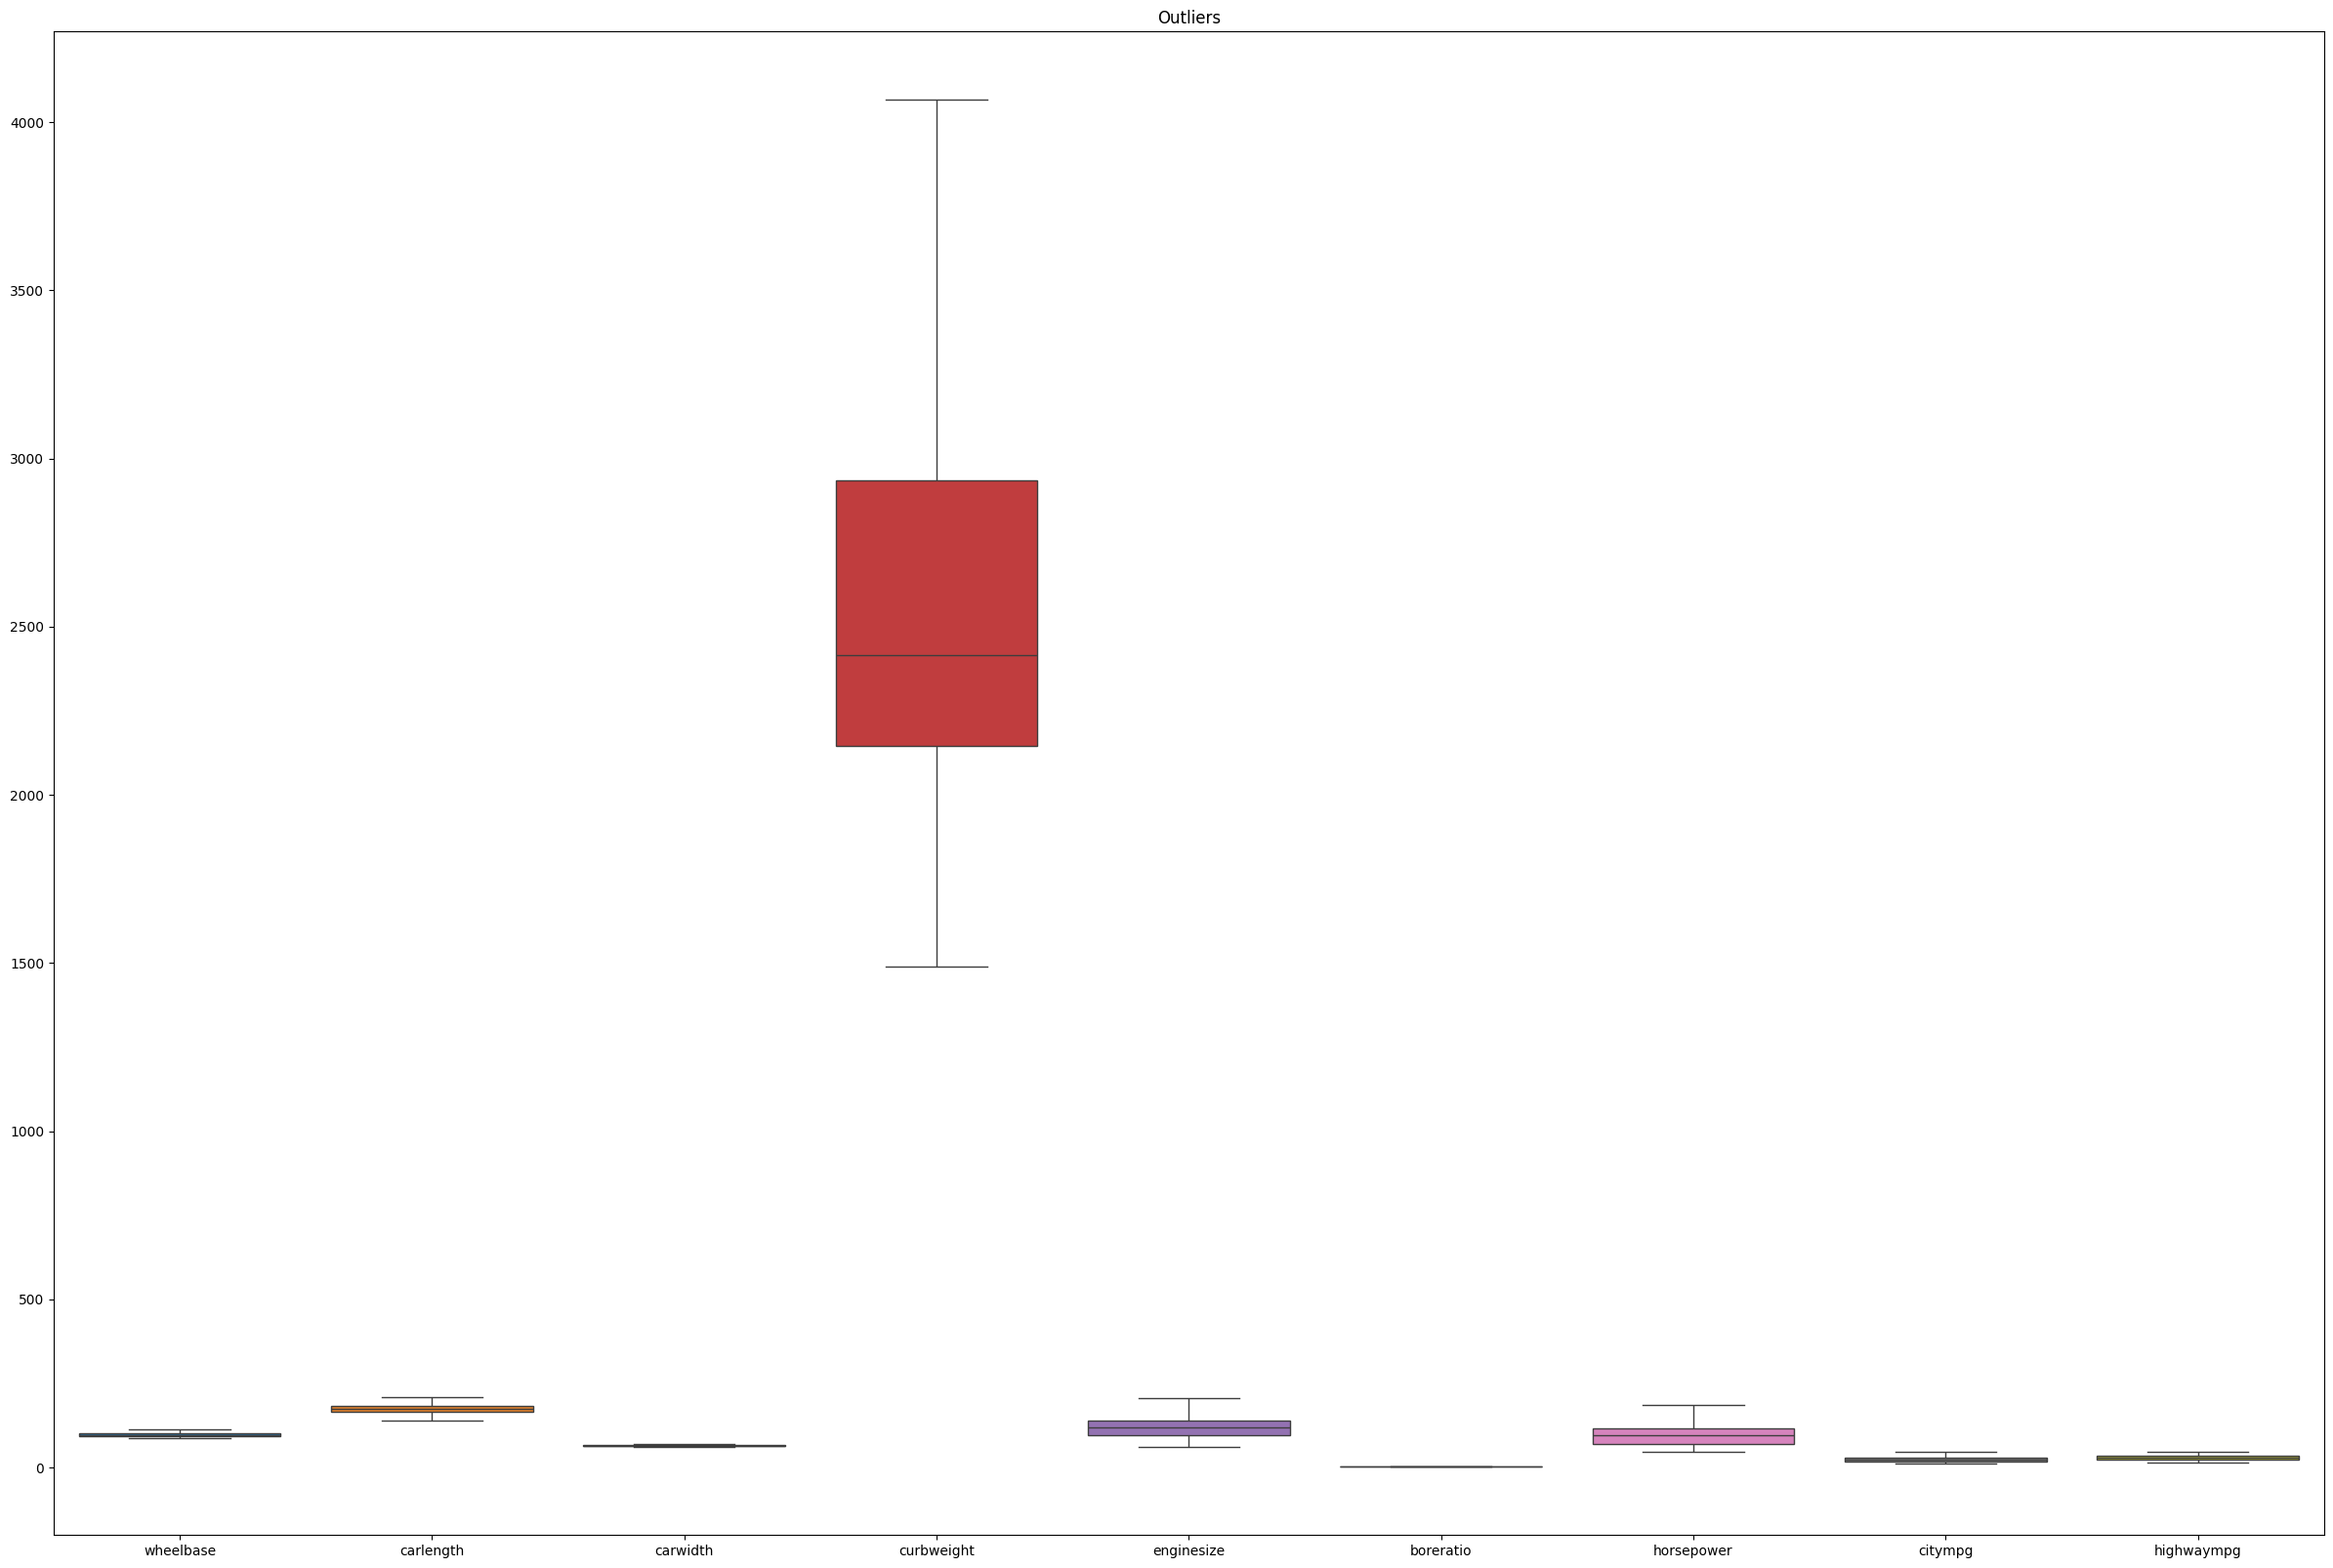

In [ ]:
plt.figure(figsize=(30, 20))
outliersColumns = df1.get(['wheelbase',	'carlength',	'carwidth',	'curbweight','enginesize',	'boreratio',	'horsepower',	'citympg',	'highwaympg'	])
sns.boxplot(data=outliersColumns)
plt.title("Outliers")
plt.show()

Outliers are replaced by upper limit and lower limit which are found from IQR Method.


### DATA PROCESSING

In [ ]:
# Features "Inputs" (X)
X =df1.drop(columns=['price'])

# Target variable "Outputs" (Y)
Y = df1['price']

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (205, 15)
Shape of Y: (205,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (164, 15)
Shape of X_test: (41, 15)
Shape of Y_train: (164,)
Shape of Y_test: (41,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Implementation

In [ ]:
# Linear regression

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [ ]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, Y_train)


DecisionTreeRegressor()

In [ ]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, Y_train)

RandomForestRegressor()

In [ ]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, Y_train)

GradientBoostingRegressor()

In [ ]:
# Support Vector Regressor

from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train_scaled, Y_train)

SVR()

### Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
models = {"Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor":GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()}


In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)  # Fit model
    Y_pred = model.predict(X_test_scaled)  # Make predictions
    print(f"Model: {name}")
    print(f"R-squared: {r2_score(Y_test, Y_pred)}")
    print(f"MSE: {mean_squared_error(Y_test, Y_pred)}")
    print(f"MAE: {mean_absolute_error(Y_test, Y_pred)}")
    print()


Model: Linear Regression
R-squared: 0.7434693150560547
MSE: 19859671.40060402
MAE: 3018.427051973456

Model: Decision Tree Regressor
R-squared: 0.8485709862411203
MSE: 11723082.774390243
MAE: 2247.3536585365855

Model: Random Forest Regressor
R-squared: 0.9046621232063556
MSE: 7380711.2219997095
MAE: 1850.5909958536588

Model: Gradient Boosting Regressor
R-squared: 0.9004752687363062
MSE: 7704842.247477226
MAE: 1823.3312837771523

Model: Support Vector Regressor
R-squared: -0.09032211365639364
MSE: 84408767.32839783
MAE: 5662.440420519023



 We can identify the best performing model based on:

1. Highest R-squared value
2. Lowest Mean Squared Error (MSE)
3. Lowest Mean Absolute Error (MAE)


From the above 5 models, Random Forest Regressor is better performer than the others in the case of R-squared and MSE. In th ecase of MAE, Gradient Boosting Regressor is best.

####Model: Random Forest Regressor

   R-squared: 0.9046621232063556

   MSE: 7380711.2219997095

####Model: Gradient Boosting Regressor

   MAE: 1823.3312837771523


#### Feature Importance Analysis

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define the number of features to select (K)
k = 15

# Initialize SelectKBest
selector = SelectKBest(score_func=f_regression, k=k)

# Fit and transform the data
X_train_selected = selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

# Get the selected feature names
selected_features = X.columns[selected_indices]
print("Selected feature names:", selected_features)

Selected feature indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Selected feature names: Index(['fueltype', 'doornumber', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Decision Tree Regressor': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting Regressor': {
        'learning_rate': [0.1, 0.05, 0.01],
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10]
    },
    'Support Vector Regressor': {
        'C': [1, 5, 10],
        'epsilon': [0.1, 0.5, 1]
    }
}

In [ ]:
# Perform grid search for each model
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, Y_train)

    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Score for {name}: {-grid_search.best_score_}")
    print()


Best Parameters for Linear Regression: {'fit_intercept': True}
Best Score for Linear Regression: 13372465.285067428

Best Parameters for Decision Tree Regressor: {'max_depth': 10, 'min_samples_split': 10}
Best Score for Decision Tree Regressor: 6358085.3301384365

Best Parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best Score for Random Forest Regressor: 4795793.337950113

Best Parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score for Gradient Boosting Regressor: 5288321.549887862

Best Parameters for Support Vector Regressor: {'C': 10, 'epsilon': 0.1}
Best Score for Support Vector Regressor: 65960012.54796968

